#  Intensity Transformation Operations on Images

### Intensity transformations are applied on images for contrast manipulation or image thresholding. These are in the spatial domain, i.e. they are performed directly on the pixels of the image at hand, as opposed to being performed on the Fourier transform of the image. The following are commonly used intensity transformations:

**1.Image Negatives (Linear)**

**2.Log Transformations**


**3.Power-Law (Gamma) Transformations**

**4.Piecewise-Linear Transformation Functions**

## 1.Image Negatives (Linear)


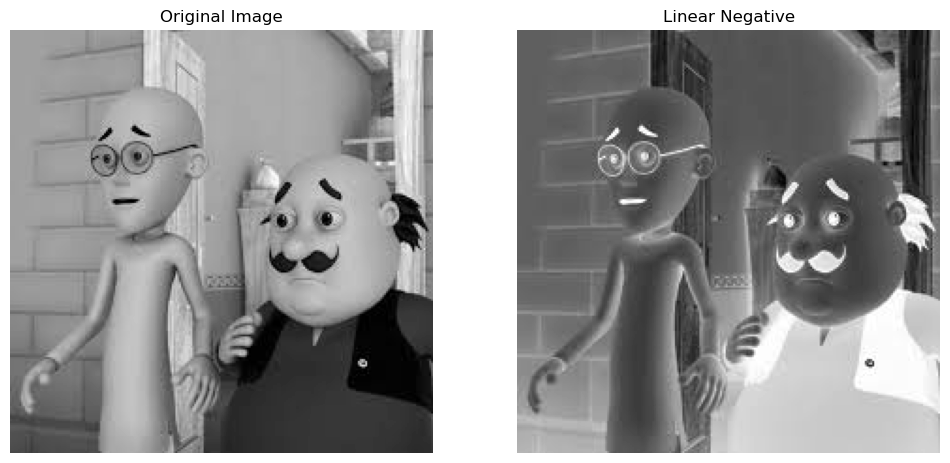

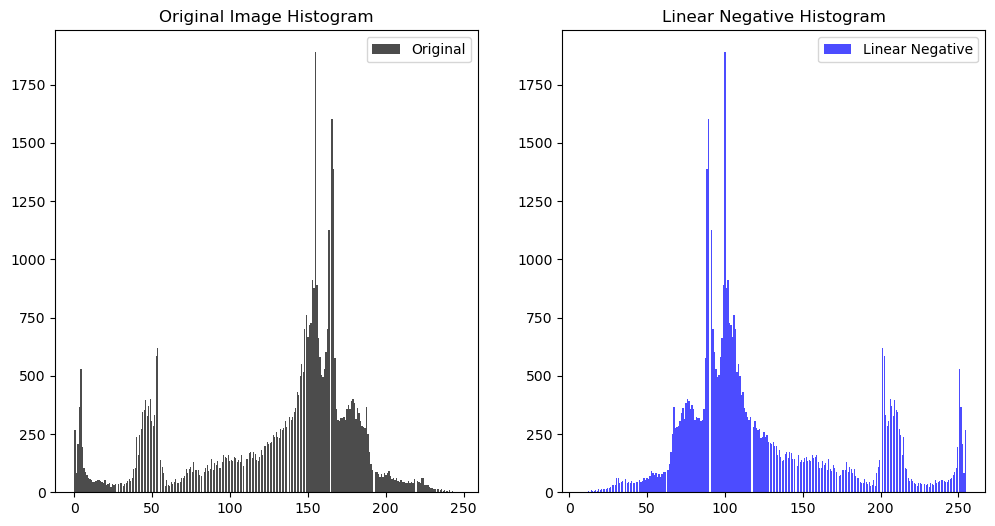

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = 'D:\ST\Pictures/Mp.jpg'  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Calculate the linear negative of the image
linear_negative = 255 - original_image

# Display the original and negative images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(linear_negative, cmap='gray')
plt.title('Linear Negative')
plt.axis('off')

# Display the histograms of the original and negative images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, color='black', alpha=0.7, rwidth=0.8, label='Original')
plt.title('Original Image Histogram')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(linear_negative.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8, label='Linear Negative')
plt.title('Linear Negative Histogram')
plt.legend()

plt.show()


## 2.Log transformations
**Log transformations are used to enhance the visibility of details in dark areas of an image by compressing the dynamic range. The log transformation is given by the formula: log_transformed = c * log(1 + original_image), where c is a constant and log is the natural logarithm.**

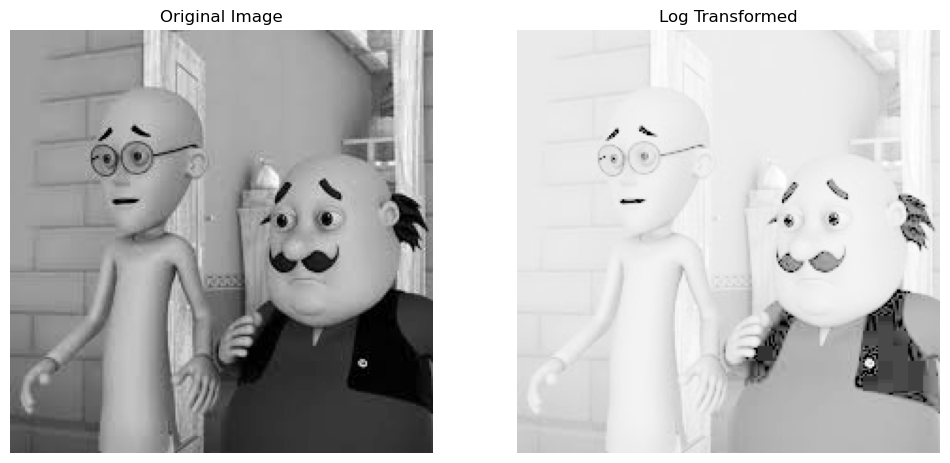

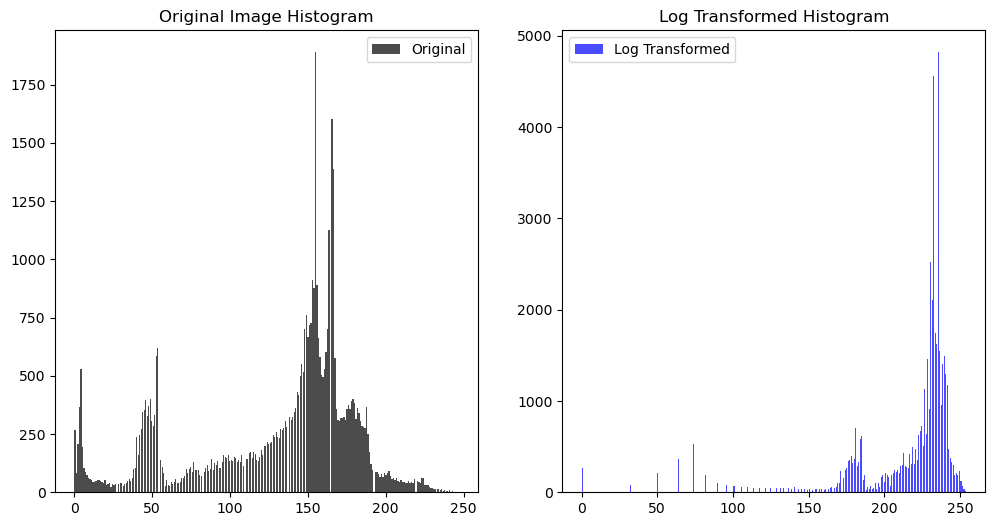

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = 'D:\ST\Pictures/Mp.jpg'  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define a constant for the log transformation (you can adjust this based on your requirements)
c = 1.0

# Apply the log transformation
log_transformed = c * np.log1p(original_image)

# Scale the pixel values back to the range [0, 255]
log_transformed = np.uint8(255 * log_transformed / np.max(log_transformed))

# Display the original and log-transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log Transformed')
plt.axis('off')

# Display the histograms of the original and log-transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, color='black', alpha=0.7, rwidth=0.8, label='Original')
plt.title('Original Image Histogram')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(log_transformed.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8, label='Log Transformed')
plt.title('Log Transformed Histogram')
plt.legend()

plt.show()


## 3.Power-Law (Gamma) Transformations

**Power-law (gamma) transformations are used to adjust the intensity values of an image based on a power-law function. The general form of the power-law transformation is given by: power_transformed = c * (original_image ^ gamma), where c is a constant and gamma is the power parameter.**

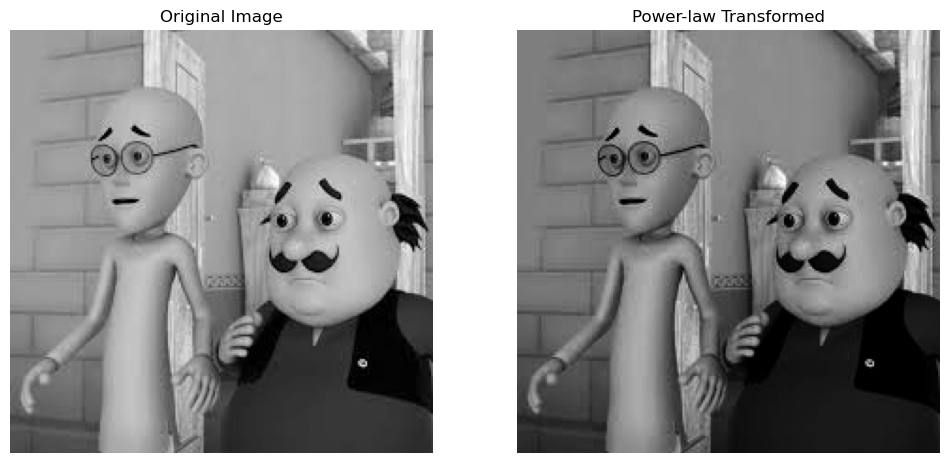

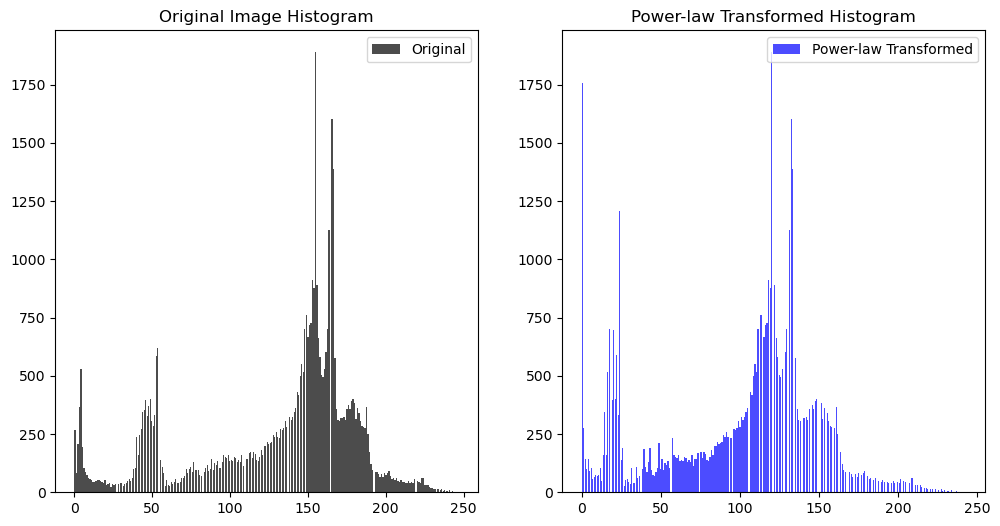

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = 'D:\ST\Pictures/Mp.jpg'  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define gamma value (you can adjust this based on your requirements)
gamma = 1.5

# Apply the power-law (gamma) transformation
power_transformed = np.power(original_image / 255.0, gamma)
power_transformed = np.uint8(255 * power_transformed)

# Display the original and power-transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(power_transformed, cmap='gray')
plt.title('Power-law Transformed')
plt.axis('off')

# Display the histograms of the original and power-transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, color='black', alpha=0.7, rwidth=0.8, label='Original')
plt.title('Original Image Histogram')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(power_transformed.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8, label='Power-law Transformed')
plt.title('Power-law Transformed Histogram')
plt.legend()

plt.show()


## 4.Piecewise-Linear Transformation Functions


**Piecewise-linear transformation functions involve dividing the pixel intensity range into multiple intervals and applying different linear transformations to each interval. This allows for more fine-grained control over the mapping of pixel intensities.**

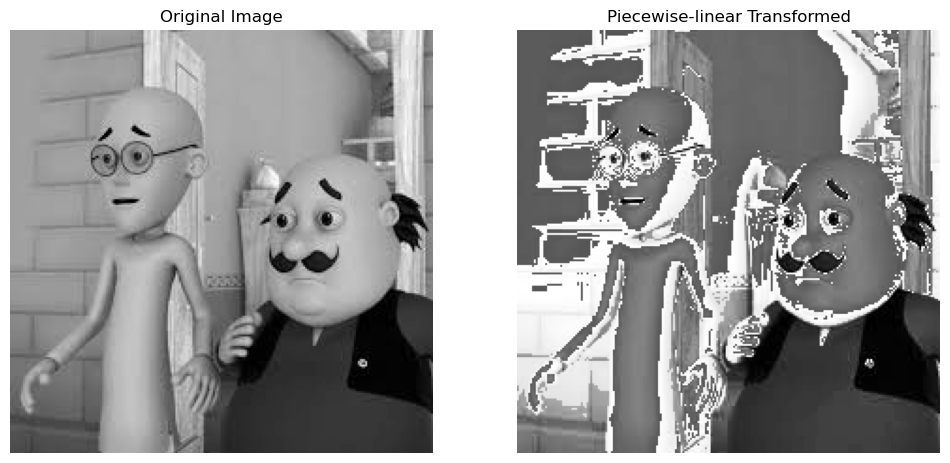

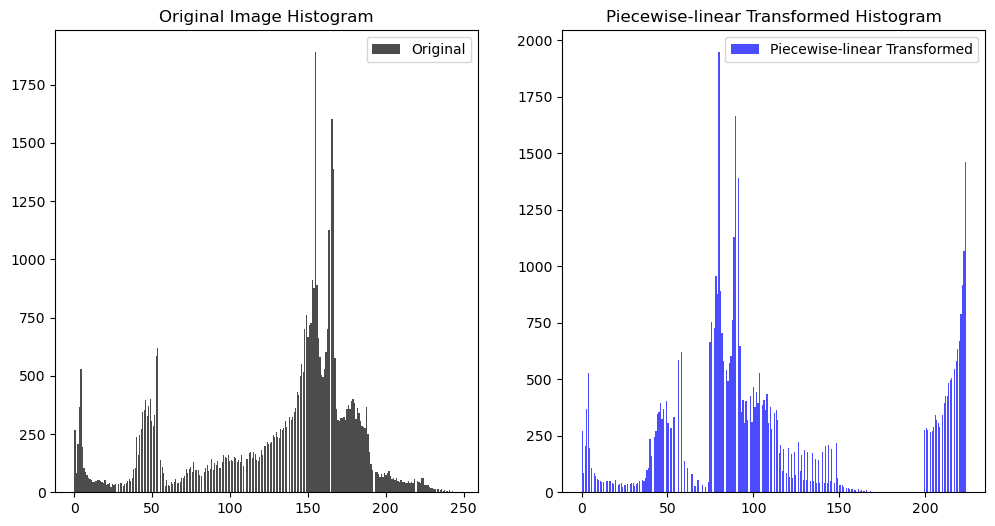

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = 'D:\ST\Pictures/Mp.jpg'  # Replace with the actual path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define breakpoints and slopes for piecewise-linear transformation
breakpoints = [50, 100, 150, 200]  # Intensity breakpoints
slopes = [1, 2, 0.5, 1]            # Slopes for each interval

# Apply piecewise-linear transformation
piecewise_linear_transformed = np.piecewise(original_image, [original_image < breakpoints[0],
                                                             (original_image >= breakpoints[0]) & (original_image < breakpoints[1]),
                                                             (original_image >= breakpoints[1]) & (original_image < breakpoints[2]),
                                                             (original_image >= breakpoints[2]) & (original_image < breakpoints[3]),
                                                             original_image >= breakpoints[3]],
                                            [lambda x: slopes[0] * x,
                                             lambda x: slopes[1] * (x - breakpoints[0]) + slopes[0] * breakpoints[0],
                                             lambda x: slopes[2] * (x - breakpoints[1]) + slopes[1] * breakpoints[1],
                                             lambda x: slopes[3] * (x - breakpoints[2]) + slopes[2] * breakpoints[2],
                                             lambda x: slopes[3] * (x - breakpoints[2]) + slopes[2] * breakpoints[2]])

# Display the original and piecewise-linear transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(piecewise_linear_transformed, cmap='gray')
plt.title('Piecewise-linear Transformed')
plt.axis('off')

# Display the histograms of the original and piecewise-linear transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(original_image.ravel(), bins=256, color='black', alpha=0.7, rwidth=0.8, label='Original')
plt.title('Original Image Histogram')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(piecewise_linear_transformed.ravel(), bins=256, color='blue', alpha=0.7, rwidth=0.8, label='Piecewise-linear Transformed')
plt.title('Piecewise-linear Transformed Histogram')
plt.legend()

plt.show()
